# Introduction
Greetings! I'm Gurpreet Singh, an AI engineer passionate about leveraging cutting-edge technologies to solve complex problems. With a strong background in artificial intelligence, machine learning, and data science, I thrive on exploring innovative solutions that push the boundaries of what's possible.

* Developing predictive models for financial forecasting.
* Implementing computer vision solutions for object detection and classification.
* Building conversational AI systems for customer support and virtual assistants.
* Contributing to research and development initiatives aimed at advancing the field of artificial intelligence.
# LinkedIn: https://www.linkedin.com/in/gurpereet-singh-9836781a5,
# Github:https://github.com/gurpreetsingh1111/Titanic-Servival-Prediction-
# Twitter: https://twitter.com/Gurpree95408151

# *Understanding the Dataset:*

In [51]:
import pandas as pd

# Step 1: Load the Titanic dataset from a CSV file

titanic_df =pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv', index_col=None)
# titanic_df.head(2)
# Step 2: Familiarize yourself with the features (columns) present in the dataset
print(titanic_df.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [52]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
# Display information about the columns and their data types
print("\nInformation about the dataset:")
print(titanic_df.info())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(titanic_df.describe())

# Check for any missing values in the dataset
print("\nMissing values in the dataset:")
print(titanic_df.isnull().sum())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics for numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.

# Data Preprocessing:

In [54]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
print(titanic_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [60]:
# You can create other visualizations to explore more relationships
# Step 6: Handle missing values and preprocessing will be addressed in subsequent steps
# Step 6: Handle missing values and preprocessing

# Handle missing values in the 'Age' column by imputing the mean age
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)

# Handle missing values in the 'Embarked' column by imputing the most frequent value
most_frequent_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Drop the 'Cabin' column since it has too many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Check if there are any remaining missing values
print(titanic_df.isnull().sum())

# Convert categorical variables into numerical representations
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Feature Engineering: Extract titles from 'Name' feature
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Map titles to categories and encode them numerically
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Col": 7, "Major": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
titanic_df['Title'] = titanic_df['Title'].map(title_mapping)

# Drop unnecessary features
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display the updated dataframe
print(titanic_df.head())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64
   Survived  Pclass   Age  SibSp  Parch     Fare  Title  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500    1.0      True       False   
1         1       1  38.0      1      0  71.2833    3.0     False       False   
2         1       3  26.0      0      0   7.9250    2.0     False       False   
3         1       1  35.0      1      0  53.1000    3.0     False       False   
4         0       3  35.0      0      0   8.0500    1.0      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [61]:

# Check if there are any remaining missing values
print(titanic_df.isnull().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Title         1
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


# Exploratory Data Analysis (EDA):

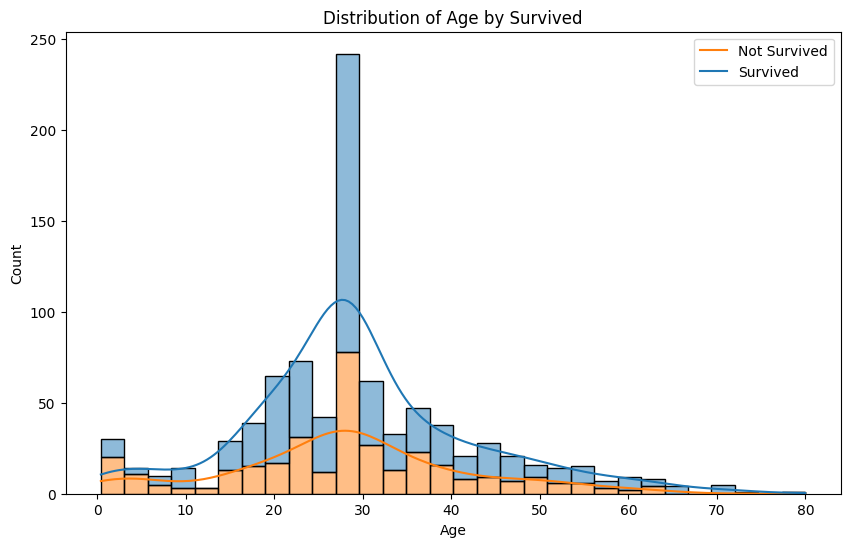

In [62]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Ignore FutureWarning related to use_inf_as_na and grouping with a length-1 list-like
warnings.simplefilter(action='ignore', category=FutureWarning)
# Explore the distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
plt.title('Distribution of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

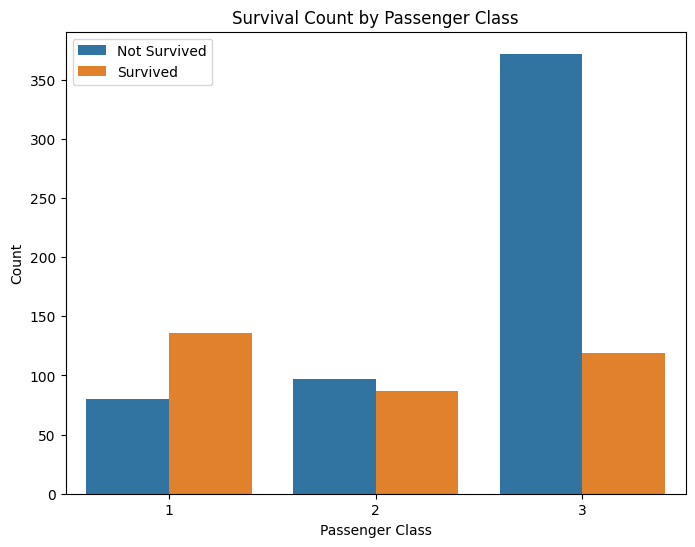

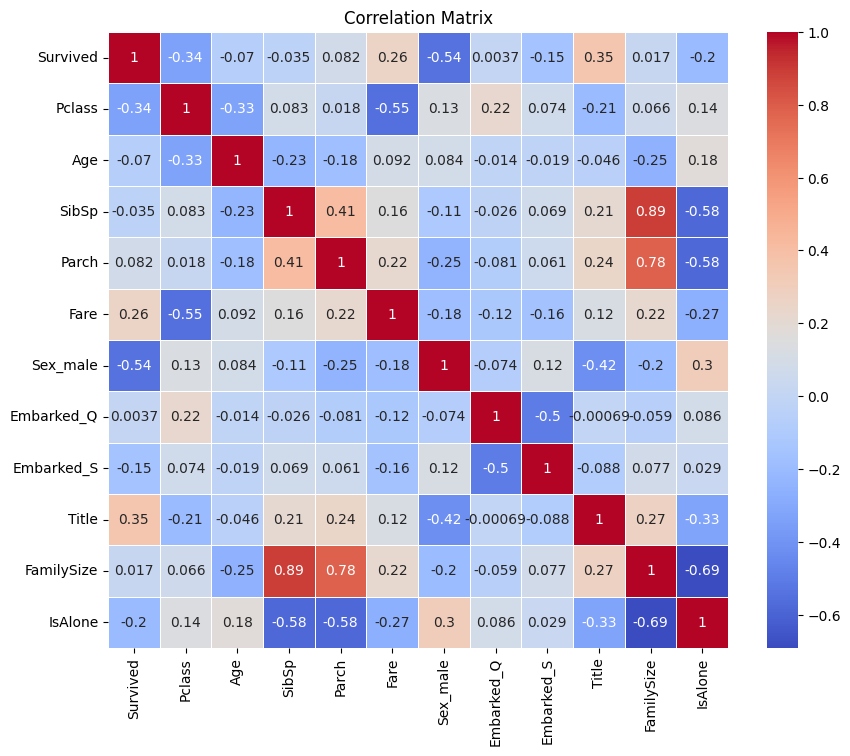

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Explore correlations
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

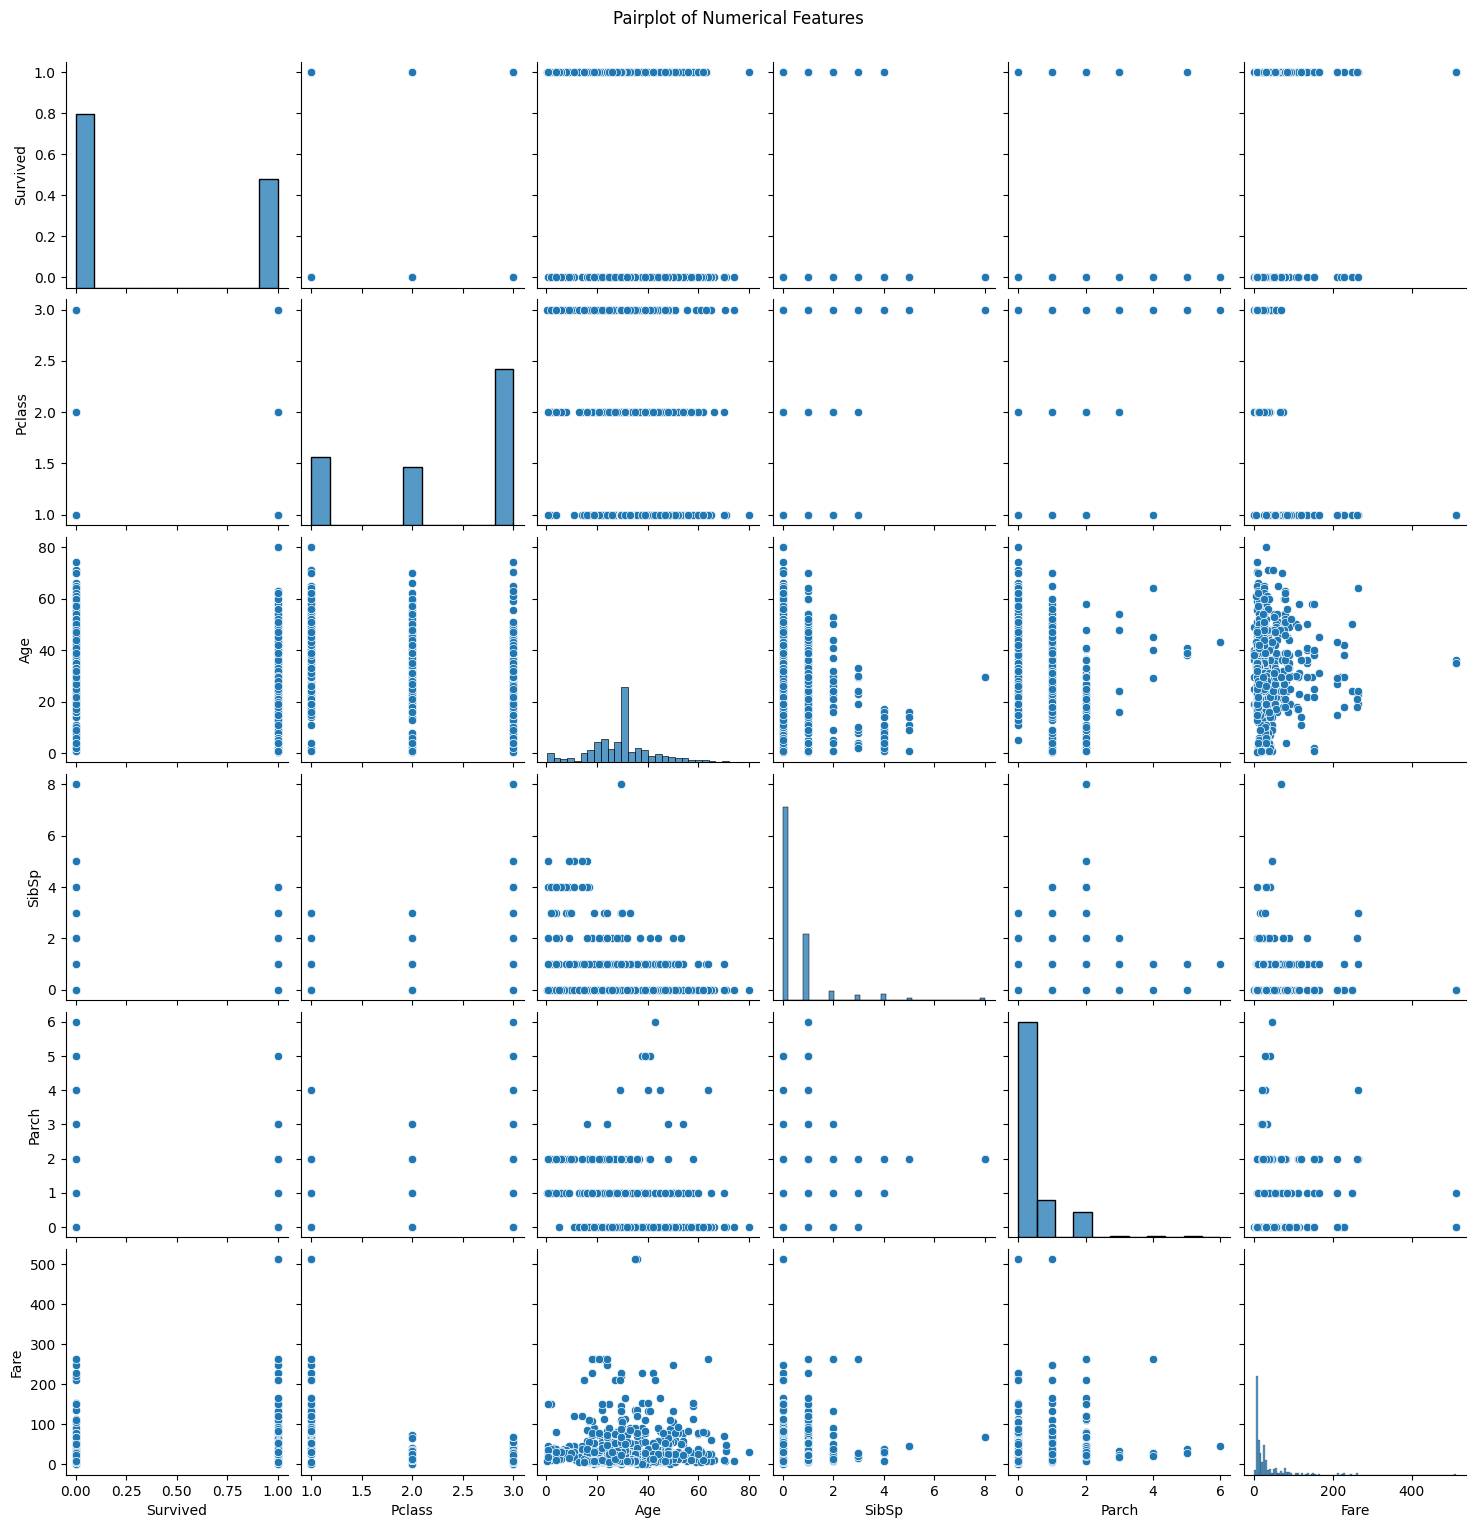

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between numerical features
sns.pairplot(titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


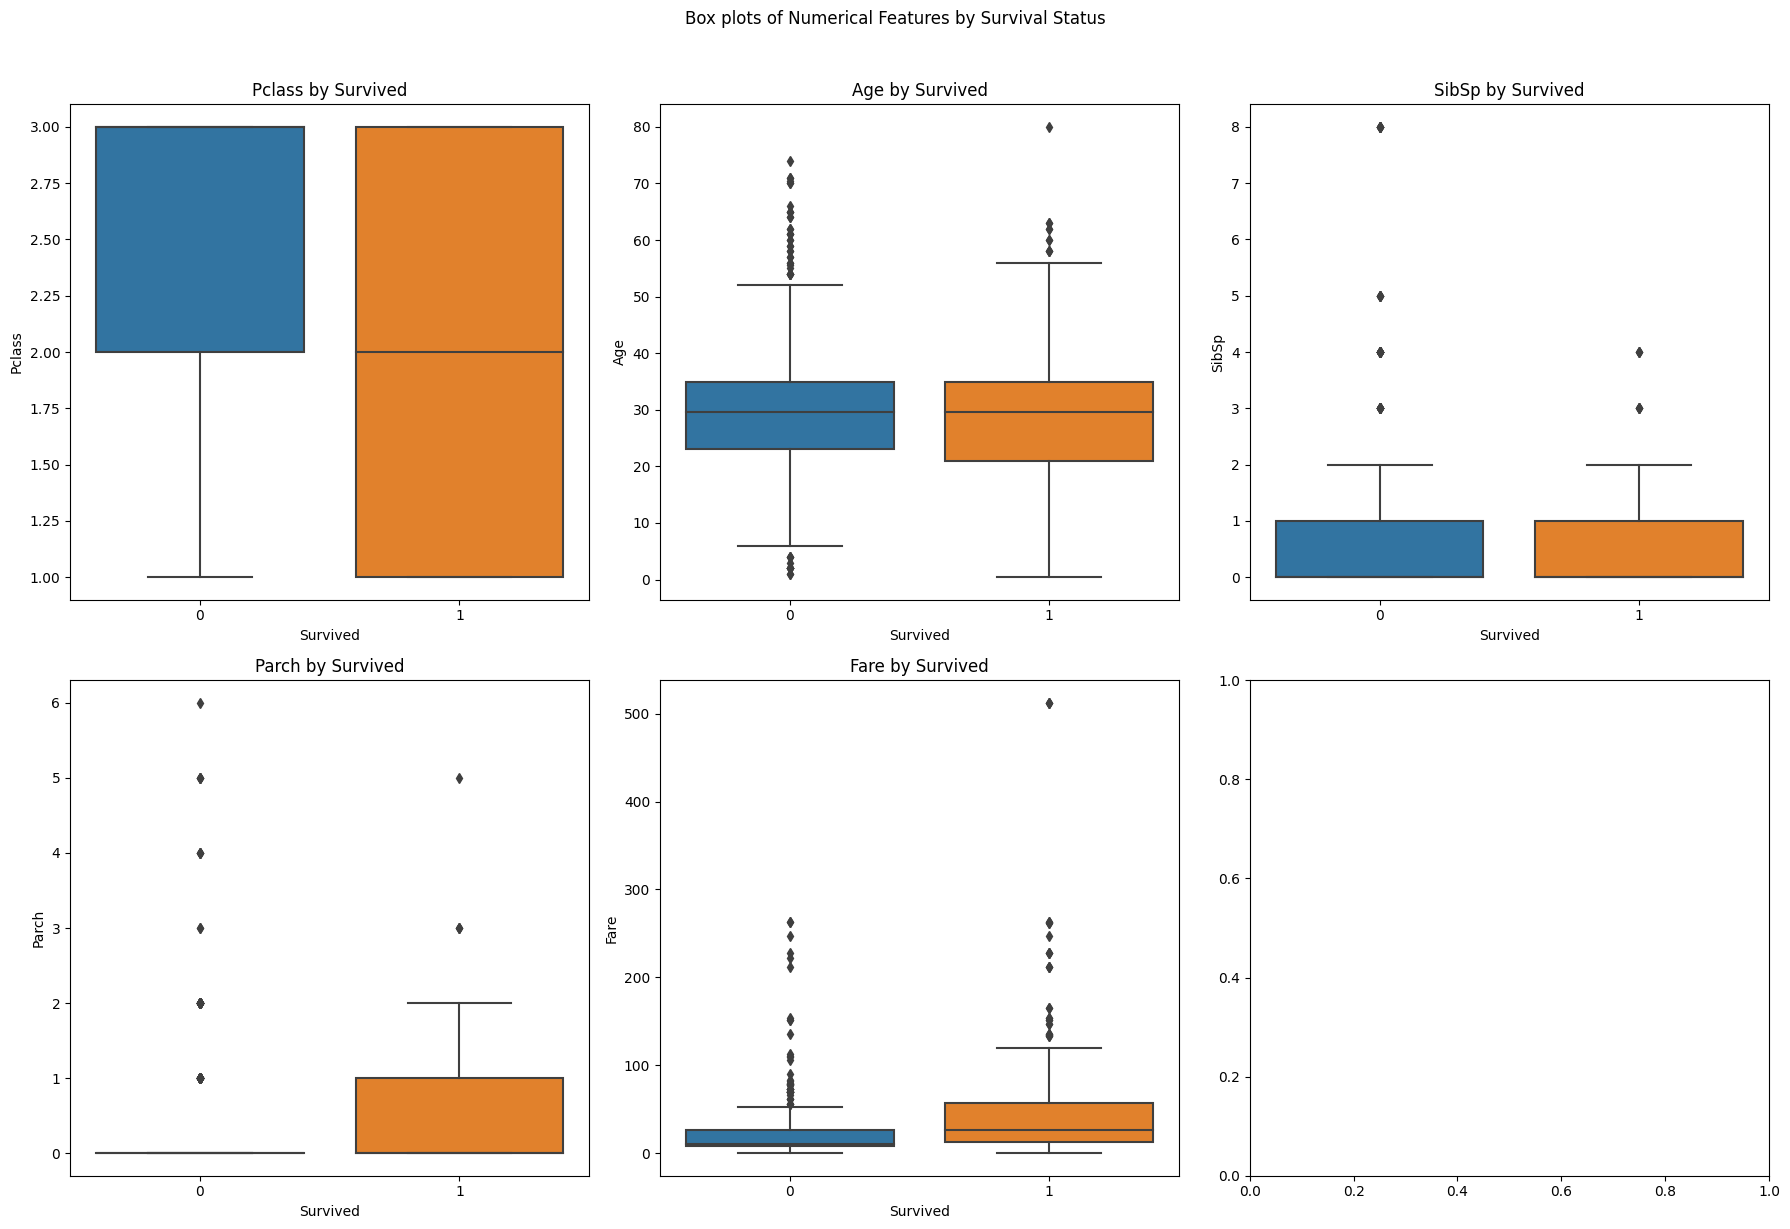

In [37]:
# Box plots to visualize the distribution of numerical features by survival status
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, col in enumerate(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']):
    sns.boxplot(x='Survived', y=col, data=titanic_df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} by Survived')
plt.suptitle('Box plots of Numerical Features by Survival Status', y=1.02)
plt.tight_layout()
plt.show()

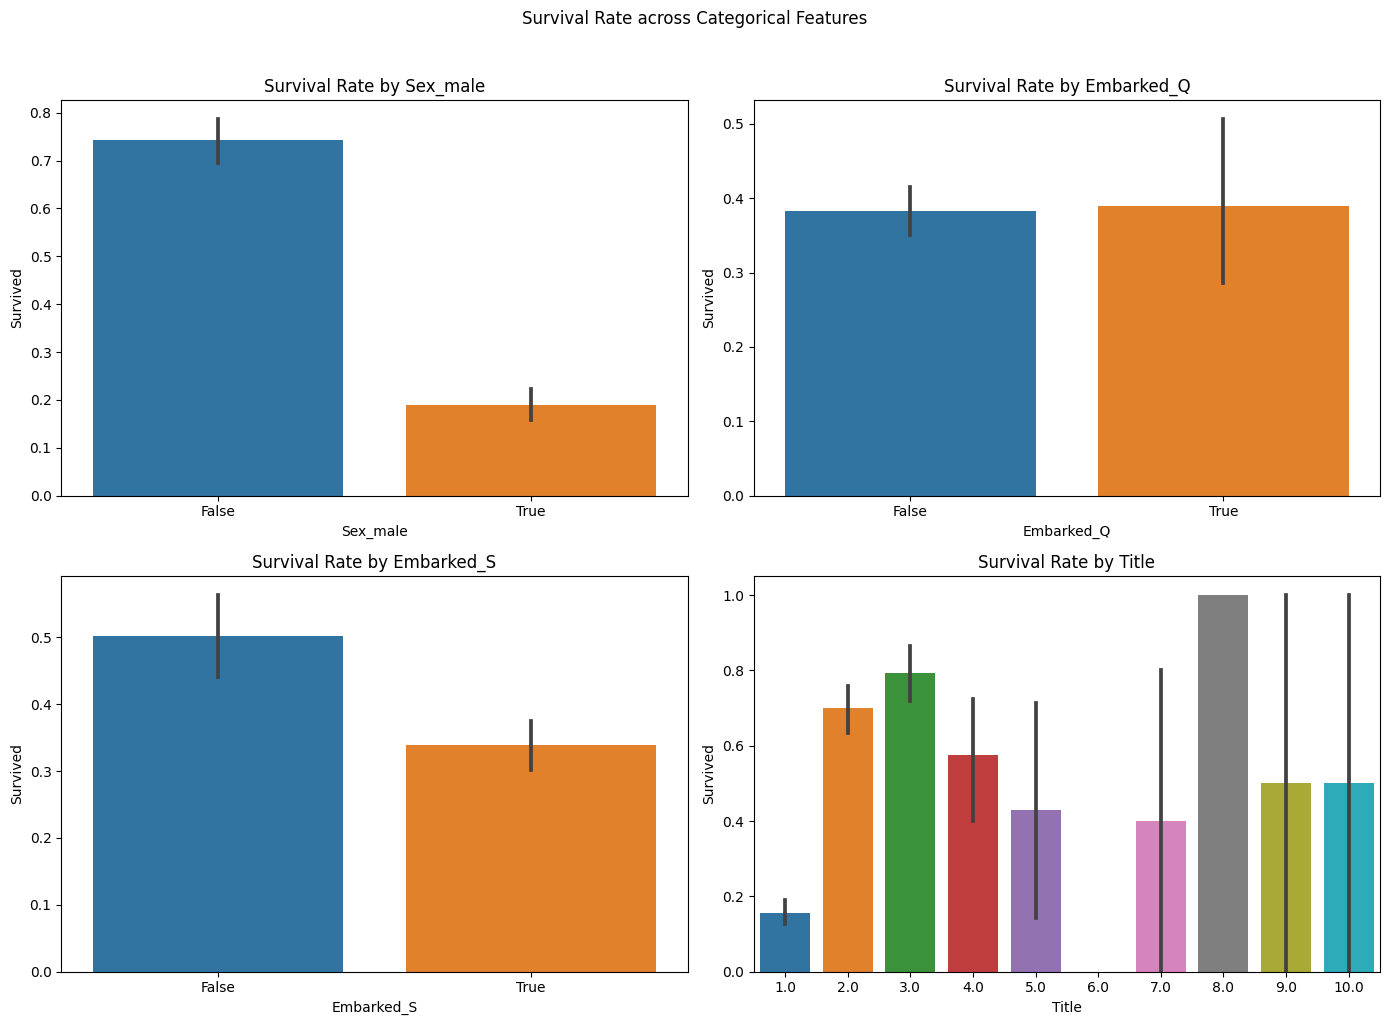

In [38]:
# Bar plots to visualize survival rates across categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title']):
    sns.barplot(x=col, y='Survived', data=titanic_df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Survival Rate by {col}')
plt.suptitle('Survival Rate across Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

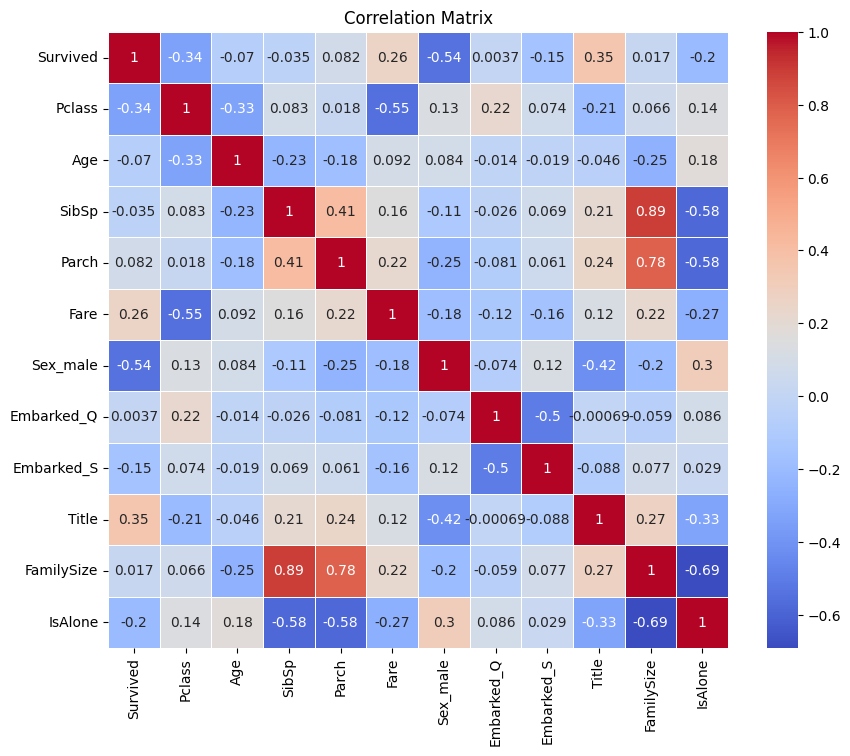

In [39]:
# Correlation matrix heatmap with annotations
corr_matrix = titanic_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [63]:
# Identify missing values in the dataset
missing_values = titanic_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Handle missing values: Impute with mean or median
# You can also choose other strategies such as mode or specific value
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Title'].fillna(titanic_df['Title'].mode()[0], inplace=True)

# Alternatively, you can drop rows with missing values
# df.dropna(inplace=True)

# Now, proceed with training your models


Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Title         1
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [64]:
# Impute missing value in 'Title' column with mode
mode_title = titanic_df['Title'].mode()[0]
titanic_df['Title'].fillna(mode_title, inplace=True)

# Alternatively, you can drop the row containing the missing value
# df.dropna(subset=['Title'], inplace=True)


In [65]:
missing_values = titanic_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


# Feature selection

In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

# Load your Titanic dataset into a DataFrame (assuming it's already loaded)

# Separate features (X) and target variable (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier to estimate feature importance
rf_clf.fit(X_imputed, y)

# Extract feature importance scores
feature_importances = rf_clf.feature_importances_

# Select features with importance scores above a certain threshold
selector = SelectFromModel(rf_clf, threshold=0.05)
selector.fit(X_imputed, y)

# Get the indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features_names = X.columns[selected_features_indices]

# Display selected features
print("Selected Features:")
print(selected_features_names)


Selected Features:
Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Title', 'Sex_male'], dtype='object')


In [67]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 6)
Shape of X_test: (179, 6)
Shape of y_train: (712,)
Shape of y_test: (179,)


# Model Selection

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Initialize instances of the chosen algorithms with default parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Preprocess features if necessary (e.g., standardization for SVM or KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model using cross-validation
for name, model in models.items():
    print(f"Training {name}...")

    # Perform grid search for hyperparameter tuning
    if name in ['Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']:
        param_grid = {}  # Define hyperparameter grid for each model
        if name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300],
                          'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 5, 10]}
        elif name == 'Gradient Boosting':
            param_grid = {'n_estimators': [100, 200, 300],
                          'learning_rate': [0.01, 0.1, 0.5],
                          'max_depth': [3, 5, 7]}
        elif name == 'Support Vector Machine':
            param_grid = {'C': [0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}
        elif name == 'K-Nearest Neighbors':
            param_grid = {'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}
        
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)
    else:
        model.fit(X_train_scaled if name != 'K-Nearest Neighbors' else X_train, y_train)
        y_pred = model.predict(X_test_scaled if name != 'K-Nearest Neighbors' else X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.2f}")

    # Print classification report and confusion matrix
    print(f"Classification Report of {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix of {name}:")
    print(confusion_matrix(y_test, y_pred))
    print()


Training Logistic Regression...
Accuracy of Logistic Regression: 0.79
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix of Logistic Regression:
[[86 19]
 [19 55]]

Training Decision Tree...
Accuracy of Decision Tree: 0.76
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.72      0.69      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

Confusion Matrix of Decision Tree:
[[85 20]
 [23 51]]

Training Random 

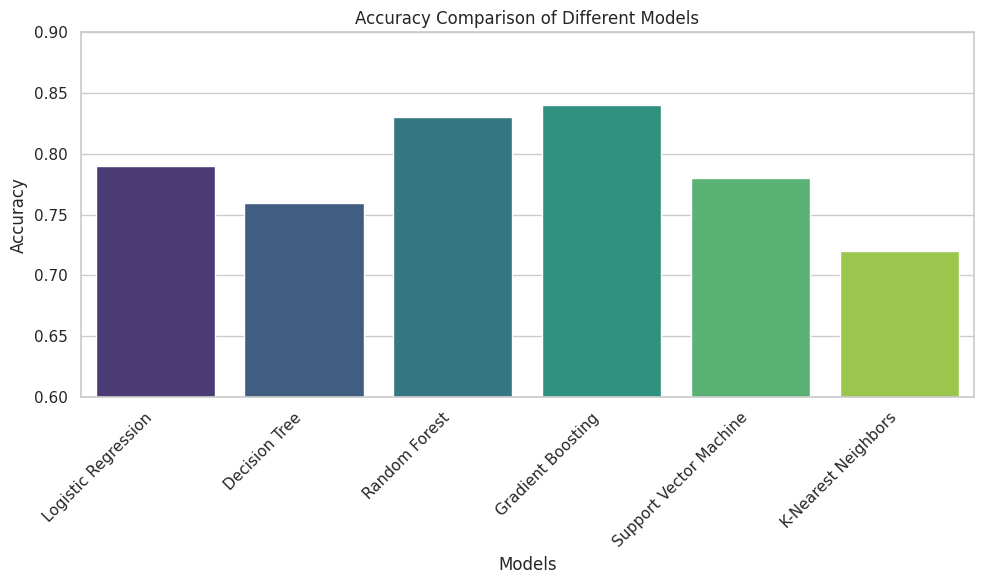

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbors']
accuracies = [0.79, 0.76, 0.83, 0.84, 0.78, 0.72]

# Create a bar plot to visualize the accuracies of different models
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.9)  # Set the y-axis limit for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


 based on the accuracy comparison and the classification report provided, the Gradient Boosting model appears to be the best performing model among those evaluated. It achieved an accuracy of 0.84 on the test dataset, which is the highest among the models tested.

# Training 

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluate model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)



Accuracy of Gradient Boosting: 0.8268156424581006


In [73]:
# Classification report
print("Classification Report of Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [74]:

# Confusion matrix
print("Confusion Matrix of Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))


Confusion Matrix of Gradient Boosting:
[[93 12]
 [19 55]]


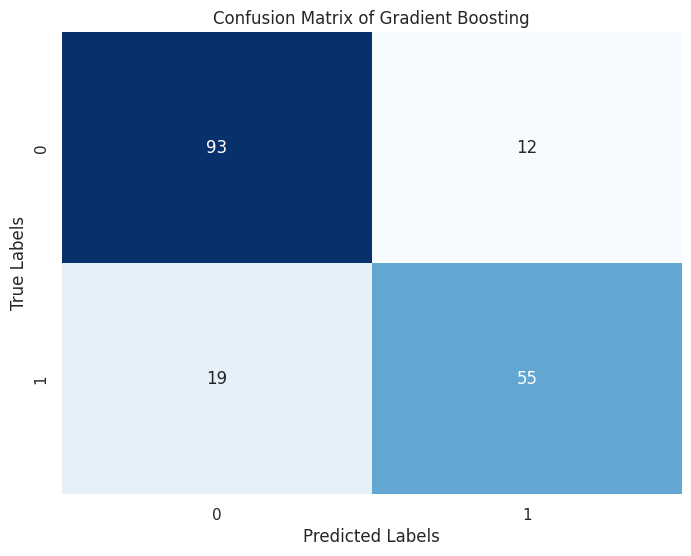

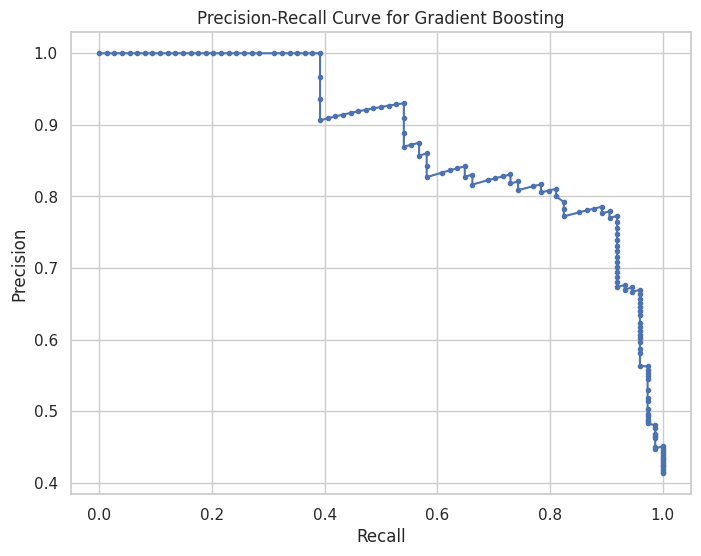

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Gradient Boosting')
plt.show()

# Plotting precision-recall curve
from sklearn.metrics import precision_recall_curve

precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.show()


# Model Evaluation

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Predict the labels for the test set using the Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

# Print the evaluation metrics for the Gradient Boosting model
print("Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1-score: {f1_gb:.2f}")
print(f"ROC-AUC: {roc_auc_gb:.2f}")


Evaluation metrics for Gradient Boosting:
Accuracy: 0.83
Precision: 0.82
Recall: 0.74
F1-score: 0.78
ROC-AUC: 0.81


# Hyperparameter Tuning:

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Instantiate the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Extract the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
print("ROC-AUC:", roc_auc_best)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.8156424581005587
Precision: 0.8059701492537313
Recall: 0.7297297297297297
F1-score: 0.7659574468085106
ROC-AUC: 0.802960102960103


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

# Step 2: Define and train the initial Gradient Boosting model
initial_gb_model = GradientBoostingClassifier()
initial_gb_model.fit(X_train, y_train)

# Step 3: Evaluate the initial model
initial_predictions = initial_gb_model.predict(X_test)
initial_accuracy = accuracy_score(y_test, initial_predictions)
initial_precision = precision_score(y_test, initial_predictions)
initial_recall = recall_score(y_test, initial_predictions)
initial_f1 = f1_score(y_test, initial_predictions)
initial_roc_auc = roc_auc_score(y_test, initial_predictions)

print("Initial Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {initial_accuracy}")
print(f"Precision: {initial_precision}")
print(f"Recall: {initial_recall}")
print(f"F1-score: {initial_f1}")
print(f"ROC-AUC: {initial_roc_auc}")

#


Initial Evaluation metrics for Gradient Boosting:
Accuracy: 0.8268156424581006
Precision: 0.8208955223880597
Recall: 0.7432432432432432
F1-score: 0.7801418439716312
ROC-AUC: 0.8144787644787644


In [87]:
#  Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Step 5: Evaluate the tuned Gradient Boosting model
best_predictions = best_gb_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_roc_auc = roc_auc_score(y_test, best_predictions)

print("Evaluation metrics for Gradient Boosting after hyperparameter tuning:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1-score: {best_f1}")
print(f"ROC-AUC: {best_roc_auc}")

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}
Evaluation metrics for Gradient Boosting after hyperparameter tuning:
Accuracy: 0.8324022346368715
Precision: 0.8142857142857143
Recall: 0.7702702702702703
F1-score: 0.7916666666666666
ROC-AUC: 0.8232303732303732


In [92]:
Final_model=best_gb_model

## Now here we have final updated model that is: Final_model

# Model Testing :

In [93]:
# Make predictions on the testing set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Evaluation metrics:
Accuracy: 0.8324022346368715
Precision: 0.8142857142857143
Recall: 0.7702702702702703
F1-score: 0.7916666666666666


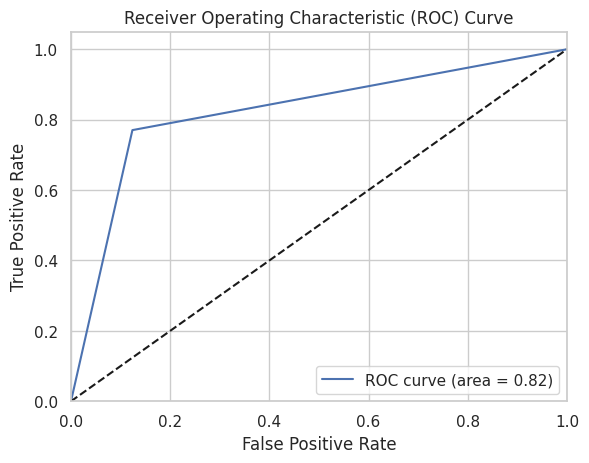

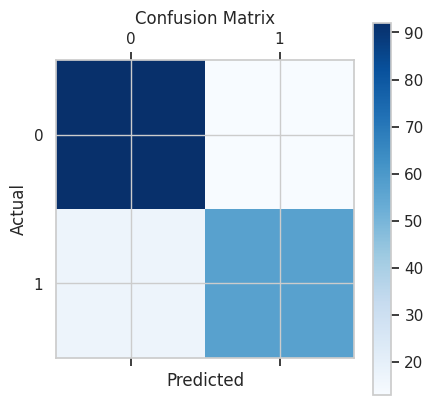

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


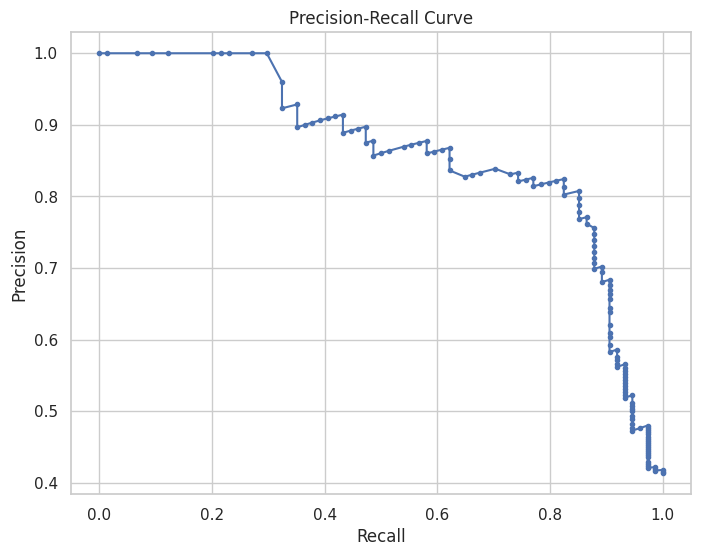

In [97]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming best_gb_model is your trained Gradient Boosting model
y_scores = best_gb_model.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


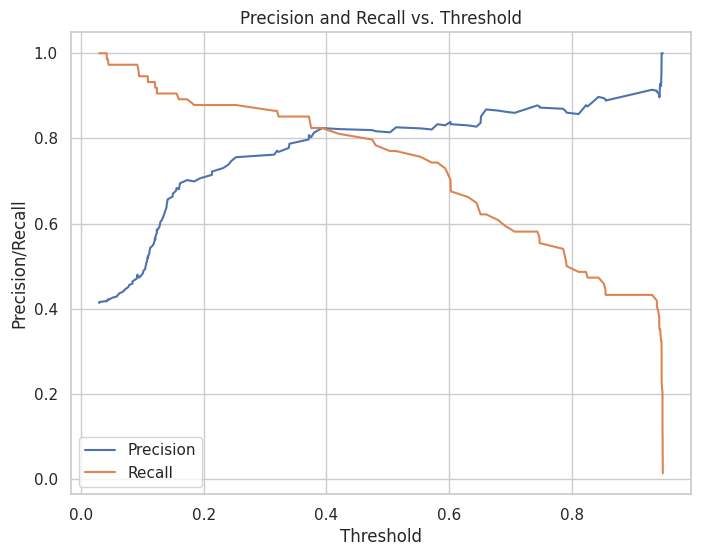

In [101]:
# Precision-Recall vs. Threshold Plot
# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.show()